In [2]:
from pm4py.objects.log.importer.xes import importer as xes_importer

ModuleNotFoundError: No module named 'pm4py'

## Visualization
Plot creating for usage in the bachelor thesis

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import itertools
import numpy as np
import statistics

In [2]:
width = 'thesis' # 448.13095
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 448.13095
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='upper left')

In [4]:
plt.style.use('seaborn')
plt.style.use('tex')
sns.set_style("whitegrid")
flierprops = dict(marker='o', markerfacecolor='green', markersize=1,
                  markeredgecolor='none')

save_dir = './ba_tex/figures/'

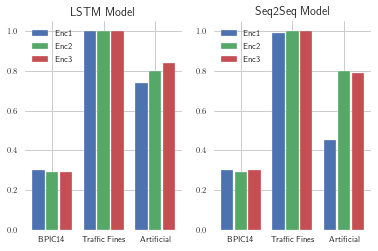

In [139]:
datasets = ["BPIC14", "Traffic Fines", "Artificial"]
data_LSTM = {
    "Enc1": [0.3, 1.0, 0.74],
    "Enc2": [0.29, 1.0, 0.80],
    "Enc3": [0.29, 1.0, 0.84],
}
data_Seq2Seq = {
    "Enc1": [0.3, 0.99, 0.45],
    "Enc2": [0.29, 1.0, 0.8],
    "Enc3": [0.3, 1.0, 0.79],
}

fig, axs = plt.subplots(1, 2, figsize=set_size(width))

bar_plot(axs[0], data_LSTM, total_width=.8, single_width=.9)
axs[0].set_xticks(range(3)) 
axs[0].set_xticklabels(datasets)
axs[0].set_title('LSTM Model')

bar_plot(axs[1], data_Seq2Seq, total_width=.8, single_width=.9)
axs[1].set_xticks(range(3)) 
axs[1].set_xticklabels(datasets)
axs[1].set_title('Seq2Seq Model')

#fig.suptitle('Accuracy results for the given configurations')
#plt.savefig(save_dir+"double_accuracy.pdf", format='pdf', bbox_inches='tight')
plt.show()

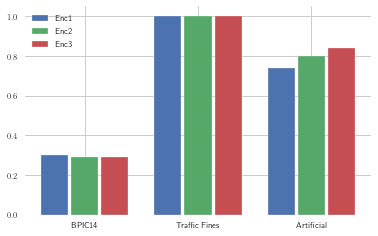

In [137]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
bar_plot(axs, data_LSTM, total_width=.8, single_width=.9)
axs.set_xticks(range(3)) 
axs.set_xticklabels(datasets)
#plt.savefig(save_dir+"LSTM_accuracy.pdf", format='pdf', bbox_inches='tight')
plt.show()

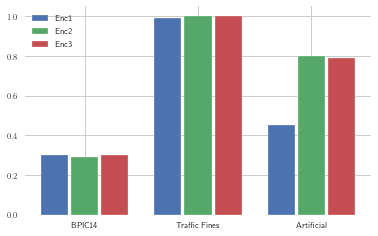

In [138]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
bar_plot(axs, data_Seq2Seq, total_width=.8, single_width=.9)
axs.set_xticks(range(3)) 
axs.set_xticklabels(datasets)
#plt.savefig(save_dir+"Seq2Seq_accuracy.pdf", format='pdf', bbox_inches='tight')
plt.show()

### Plotting the Boxplots

probability distibution of the predicted possible resolutions

In [5]:
def load_dict(path: str):
  a_file = open(path, "rb")
  output2d = pickle.load(a_file)
  a_file.close()

  merged = list(itertools.chain(*list(output2d.values())))
  merged = [float(val) for val in merged]

  return merged

def split_boxplot_data(path: str):
  id_maps = []
  mult_maps = []

  a_file = open(path, "rb")
  output = pickle.load(a_file)
  a_file.close()

  for key in output:
    if type(key) == str or len(key) == 1:
      id_maps.append(output[key])
    else:
      mult_maps.append(output[key])

  id_maps = list(itertools.chain(*id_maps))
  mult_maps = list(itertools.chain(*mult_maps))

  return id_maps, mult_maps

def draw_boxplot(data):
  fig, axs = plt.subplots(1, 1, figsize=set_size(width)) 
  ax = sns.boxplot(y=data, palette=["m", "g"], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
  ax.set_ylim([-0.2, 1.2])   
  sns.despine(offset=10, trim=True)

In [11]:
prob_dir = "./prediction_probabilities/"

### LSTM ###
# Enc1
path_L1_BPIC14_a  = prob_dir + "LSTM_ENC1_BPIC14_pred_prob.pkl"
path_L1_BPIC14_b  = prob_dir + "LSTM_ENC1_BPIC14_target_prob.pkl"
path_L1_TRAFFIC_a = prob_dir + "LSTM_ENC1_TRAFFIC_pred_prob.pkl"
path_L1_TRAFFIC_b = prob_dir + "LSTM_ENC1_TRAFFIC_target_prob.pkl"
path_L1_ART1_a    = prob_dir + "LSTM_ENC1_ART1_pred_prob.pkl"
path_L1_ART1_b    = prob_dir + "LSTM_ENC1_ART1_target_prob.pkl"

# Enc2
path_L2_BPIC14_a  = prob_dir + "LSTM_ENC2_BPIC14_pred_prob.pkl"
path_L2_BPIC14_b  = prob_dir + "LSTM_ENC2_BPIC14_target_prob.pkl"
path_L2_TRAFFIC_a = prob_dir + "LSTM_ENC2_TRAFFIC_pred_prob.pkl"
path_L2_TRAFFIC_b = prob_dir + "LSTM_ENC2_TRAFFIC_target_prob.pkl"
path_L2_ART1_a    = prob_dir + "LSTM_ENC2_ART1_pred_prob.pkl"
path_L2_ART1_b    = prob_dir + "LSTM_ENC2_ART1_target_prob.pkl"

# Enc2
path_L3_BPIC14_a  = prob_dir + "LSTM_ENC3_BPIC14_pred_prob.pkl"
path_L3_BPIC14_b  = prob_dir + "LSTM_ENC3_BPIC14_target_prob.pkl"
path_L3_TRAFFIC_a = prob_dir + "LSTM_ENC3_TRAFFIC_pred_prob.pkl"
path_L3_TRAFFIC_b = prob_dir + "LSTM_ENC3_TRAFFIC_target_prob.pkl"
path_L3_ART1_a    = prob_dir + "LSTM_ENC3_ART1_pred_prob.pkl"
path_L3_ART1_b    = prob_dir + "LSTM_ENC3_ART1_target_prob.pkl"


### Seq2Seq ###
# Enc1

# Enc2
path_S2_BPIC14_a  = prob_dir + "Seq2Seq_Enc2_BPIC14_pred_prob.pkl"
path_S2_BPIC14_b  = prob_dir + "Seq2Seq_Enc2_BPIC14_target_prob.pkl"
path_S2_TRAFFIC_a = prob_dir + "Seq2Seq_Enc2_TRAFFIC_pred_prob.pkl"
path_S2_TRAFFIC_b = prob_dir + "Seq2Seq_Enc2_TRAFFIC_target_prob.pkl"
path_S2_ART1_a    = prob_dir + "Seq2Seq_Enc2_ART1_pred_prob.pkl"
path_S2_ART1_b    = prob_dir + "Seq2Seq_Enc2_ART1_target_prob.pkl"

# Enc3
path_S3_BPIC14_a  = prob_dir + "Seq2Seq_Enc3_BPIC14_pred_prob.pkl"
path_S3_BPIC14_b  = prob_dir + "Seq2Seq_Enc3_BPIC14_target_prob.pkl"
path_S3_TRAFFIC_a = prob_dir + "Seq2Seq_Enc3_TRAFFIC_pred_prob.pkl"
path_S3_TRAFFIC_b = prob_dir + "Seq2Seq_Enc3_TRAFFIC_target_prob.pkl"
path_S3_ART1_a    = prob_dir + "Seq2Seq_Enc3_ART1_pred_prob.pkl"
path_S3_ART1_b    = prob_dir + "Seq2Seq_Enc3_ART1_target_prob.pkl"

In [12]:
all_paths = [path_L1_BPIC14_a, path_L1_BPIC14_b, path_L1_TRAFFIC_a, path_L1_TRAFFIC_b, path_L1_ART1_a,
             path_L1_ART1_b, 
             
             path_L2_BPIC14_a, path_L2_BPIC14_b,path_L2_TRAFFIC_a, path_L2_TRAFFIC_b,
             path_L2_ART1_a, path_L2_ART1_b,
             
             path_L3_BPIC14_a, path_L3_BPIC14_b, path_L3_TRAFFIC_a, path_L3_TRAFFIC_b, path_L3_ART1_a,  
             path_L3_ART1_b,
             
             path_S2_BPIC14_a, path_S2_BPIC14_b, path_S2_TRAFFIC_a, path_S2_TRAFFIC_b, path_S2_ART1_a,   
             path_S2_ART1_b,
             
             path_S3_BPIC14_a, path_S3_BPIC14_b, path_S3_TRAFFIC_a, path_S3_TRAFFIC_b, path_S3_ART1_a,
             path_S3_ART1_b   
]

In [102]:
path1 = path_L1_TRAFFIC_a
path2 = path_L1_TRAFFIC_a

pred_probs = load_dict(path1)
actual_probs = load_dict(path2)

# split data into probs for identity predictions and for predictions with len>1
pred_id, pred_mult = split_boxplot_data(path1)
actual_id, actual_mult = split_boxplot_data(path2)

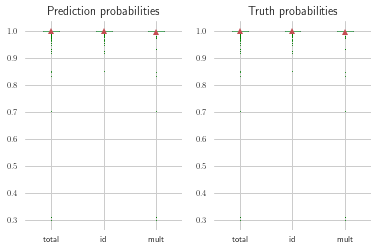

In [107]:
# sample boxplot
labels = ['total','id', 'mult']

fig, axs = plt.subplots(1, 2, figsize=set_size(width))

axs[0].boxplot([pred_probs, pred_id, pred_mult], labels=labels,
             showmeans=True, flierprops=flierprops)
axs[0].set_title('Prediction probabilities')

axs[1].boxplot([actual_probs, actual_id, actual_mult], labels=labels,
             showmeans=True, flierprops=flierprops)
axs[1].set_title('Truth probabilities')

plt.savefig(save_dir+"/boxplots/LSTM_accuracy.pdf", format='pdf', bbox_inches='tight')
plt.show()

Collect for all dataset the prediction and the true probabilities.

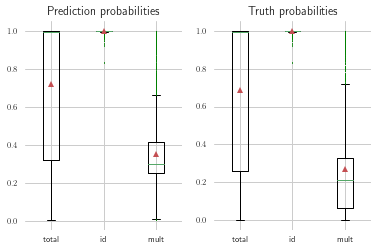

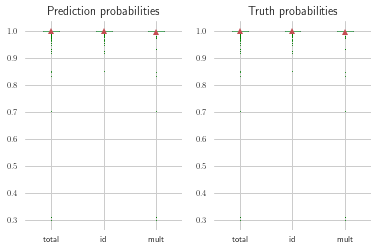

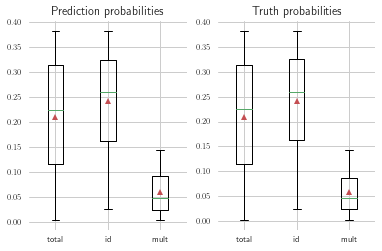

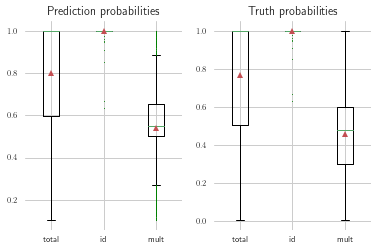

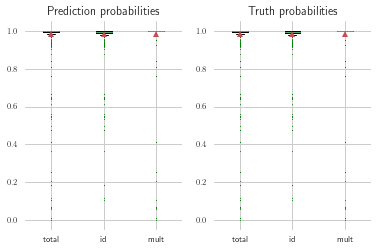

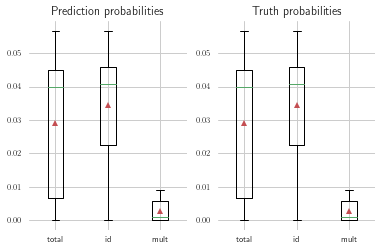

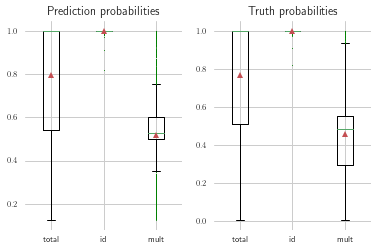

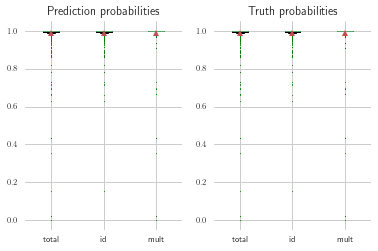

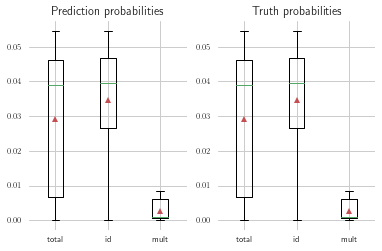

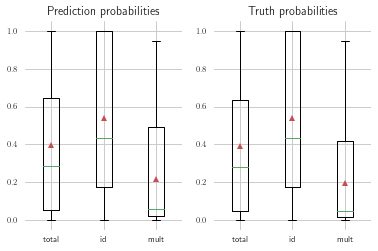

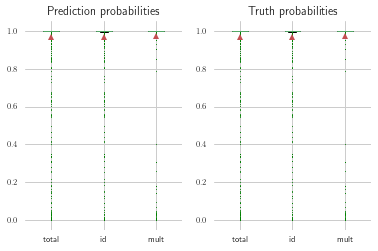

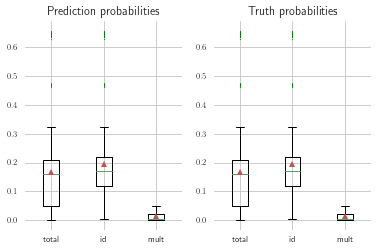

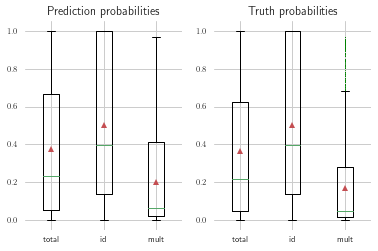

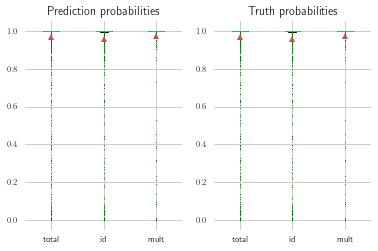

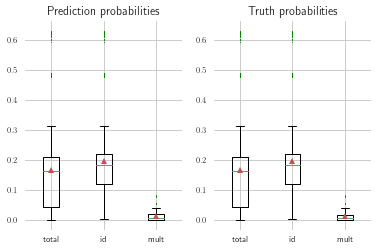

In [135]:
labels = ['total','id', 'mult']
savepaths = ['LSTM_ENC1_BPIC14', 'LSTM_ENC1_TRAFFIC', 'LSTM_ENC1_ART1',
             'LSTM_ENC2_BPIC14', 'LSTM_ENC2_TRAFFIC', 'LSTM_ENC2_ART1',
             'LSTM_ENC3_BPIC14', 'LSTM_ENC3_TRAFFIC', 'LSTM_ENC3_ART1',
             'Seq2Seq_ENC2_BPIC14', 'Seq2Seq_ENC2_TRAFFIC', 'Seq2Seq_ENC2_ART1',
             'Seq2Seq_ENC3_BPIC14', 'Seq2Seq_ENC3_TRAFFIC', 'Seq2Seq_ENC3_ART1',
            ]
for i in range(0, len(all_paths)-1, 2):
    patha = all_paths[i]
    pathb = all_paths[i+1]
    
    pred_probs   = load_dict(patha)
    actual_probs = load_dict(pathb)
    
    pred_id, pred_mult     = split_boxplot_data(patha)
    actual_id, actual_mult = split_boxplot_data(pathb)
    
    
    fig, axs = plt.subplots(1, 2, figsize=set_size(width))

    axs[0].boxplot([pred_probs, pred_id, pred_mult], labels=labels,
             showmeans=True, flierprops=flierprops)
    axs[0].set_title('Prediction probabilities')

    axs[1].boxplot([actual_probs, actual_id, actual_mult], labels=labels,
             showmeans=True, flierprops=flierprops)
    axs[1].set_title('Truth probabilities')

    plt.savefig(save_dir+"/boxplots/"+savepaths[i//2]+".pdf", format='pdf', bbox_inches='tight')

Collect for all models and datasets the id mapping plots and mult mapping plots

In [52]:
labels = ['L1B', 'L1T', 'L1A', 'L2B', 'L2T', 'L2A', 'L3B', 'L3T', 'L3A',
          'S2B', 'S2T', 'S2A', 'S3B', 'S3T', 'S3A']

total_mappings = []
id_mappings, mult_mappings = [], []

true_total_mappings = []
true_id_mappings, true_mult_mappings = [], []

for result_path in all_paths:

    if result_path.endswith('pred_prob.pkl'):
        pred_total = load_dict(result_path)
        pred_id, pred_mult = split_boxplot_data(result_path)

        total_mappings.append(pred_total)
        id_mappings.append(pred_id)
        mult_mappings.append(pred_mult)
   
    else:
        true_total = load_dict(result_path)
        true_id, true_mult = split_boxplot_data(result_path)
        
        true_total_mappings.append(true_total)
        true_id_mappings.append(true_id)
        true_mult_mappings.append(true_mult)

#### Boxplots for the total probabilites (predicted and true)

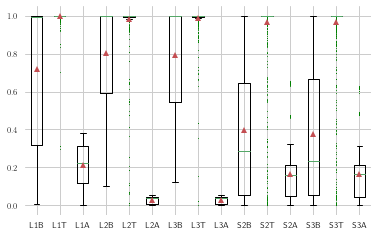

In [30]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
bp_total = plt.boxplot(total_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_total.pdf", format='pdf', bbox_inches='tight')
plt.show()

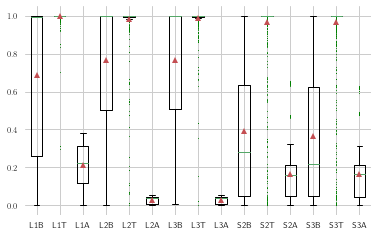

In [33]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
true_bp_total = plt.boxplot(true_total_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_total.pdf", format='pdf', bbox_inches='tight')
plt.show()

#### Boxplots for the id probabilites (predicted and true)

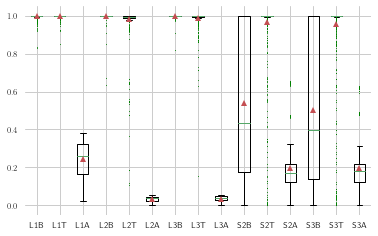

In [14]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
bp_ids = plt.boxplot(id_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_ids.pdf", format='pdf', bbox_inches='tight')
plt.show()

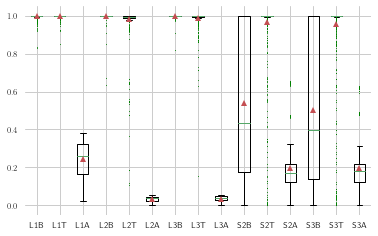

In [40]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
true_bp_ids = plt.boxplot(true_id_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_ids.pdf", format='pdf', bbox_inches='tight')
plt.show()

#### Boxplots for the mult probabilites (predicted and true)

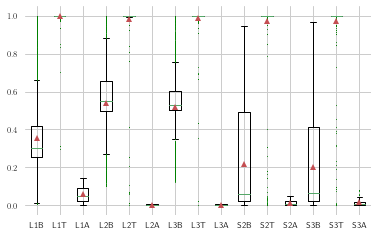

In [17]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
bp_mult = plt.boxplot(mult_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_mults.pdf", format='pdf', bbox_inches='tight')
plt.show()

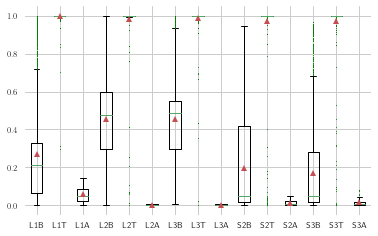

In [41]:
fig, axs = plt.subplots(1, 1, figsize=set_size(width))
true_bp_mult = plt.boxplot(true_mult_mappings, labels=labels,
             showmeans=True, flierprops=flierprops)
#plt.savefig(save_dir+"/boxplots/all_mults.pdf", format='pdf', bbox_inches='tight')
plt.show()

### Making good thesis plots ([by this guide](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

Extracting mean, median, min, max, IQR for all the boxplots

In [42]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['low_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['low_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['mean'] = bp['means'][i].get_ydata()[0]
        dict1['up_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['up_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

#### Boxplot values for the total probabilities (predicted and true)

In [49]:
# showing the boxplot characteristics for true_total mappings
total_bp_chars = get_box_plot_data(labels, bp_total)
print(round(total_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.00          0.32    1.00  0.72         1.00        1.00
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.00          0.12    0.22  0.21         0.31        0.38
3    L2B         0.10          0.60    1.00  0.80         1.00        1.00
4    L2T         0.98          0.99    1.00  0.98         1.00        1.00
5    L2A         0.00          0.01    0.04  0.03         0.05        0.06
6    L3B         0.12          0.54    1.00  0.79         1.00        1.00
7    L3T         0.99          0.99    1.00  0.99         1.00        1.00
8    L3A         0.00          0.01    0.04  0.03         0.05        0.05
9    S2B         0.00          0.06    0.29  0.40         0.65        1.00
10   S2T         1.00          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.05    0.16  0.17         0.21        0.32
12   S3B         0.00    

In [48]:
# showing the boxplot characteristics for total mappings
true_total_bp_chars = get_box_plot_data(labels, true_bp_total)
print(round(true_total_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.00          0.26    1.00  0.69         1.00        1.00
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.00          0.12    0.22  0.21         0.31        0.38
3    L2B         0.00          0.50    1.00  0.77         1.00        1.00
4    L2T         0.98          0.99    1.00  0.98         1.00        1.00
5    L2A         0.00          0.01    0.04  0.03         0.05        0.06
6    L3B         0.01          0.51    1.00  0.77         1.00        1.00
7    L3T         0.99          0.99    1.00  0.99         1.00        1.00
8    L3A         0.00          0.01    0.04  0.03         0.05        0.05
9    S2B         0.00          0.05    0.28  0.39         0.64        1.00
10   S2T         1.00          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.05    0.16  0.17         0.21        0.32
12   S3B         0.00    

In [59]:
# show differences
columns = ['low_whisker', 'low_quartile', 'median', 'mean', 'up_quartile', 'up_whisker']
val = 'mean'
for c in columns:
    print(round(total_bp_chars[c] - true_total_bp_chars[c], 2))

0     0.00
1     0.00
2     0.00
3     0.10
4     0.00
5     0.00
6     0.12
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
Name: low_whisker, dtype: float64
0     0.06
1     0.00
2     0.00
3     0.09
4     0.00
5     0.00
6     0.03
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.01
13    0.00
14    0.00
Name: low_quartile, dtype: float64
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.02
13    0.00
14    0.00
Name: median, dtype: float64
0     0.04
1     0.00
2     0.00
3     0.04
4     0.00
5     0.00
6     0.03
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.01
13    0.00
14    0.00
Name: mean, dtype: float64
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.04
13    0.00
14    0.00
Name: up_quartile, dtype: float64
0     0.0
1     

#### Boxplot values for the id probabilities (predicted and true)

In [47]:
# showing the boxplot characteristics for id mappings
id_bp_chars = get_box_plot_data(labels, bp_ids)
print(round(id_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.99          1.00    1.00  1.00         1.00        1.00
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.03          0.16    0.26  0.24         0.33        0.38
3    L2B         1.00          1.00    1.00  1.00         1.00        1.00
4    L2T         0.98          0.99    0.99  0.98         1.00        1.00
5    L2A         0.00          0.02    0.04  0.03         0.05        0.06
6    L3B         1.00          1.00    1.00  1.00         1.00        1.00
7    L3T         0.99          0.99    1.00  0.99         1.00        1.00
8    L3A         0.00          0.03    0.04  0.03         0.05        0.05
9    S2B         0.00          0.18    0.43  0.54         1.00        1.00
10   S2T         0.99          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.12    0.17  0.20         0.22        0.32
12   S3B         0.00    

In [46]:
# showing the boxplot characteristics for id mappings
true_id_bp_chars = get_box_plot_data(labels, true_bp_ids)
print(round(true_id_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.99          1.00    1.00  1.00         1.00        1.00
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.03          0.16    0.26  0.24         0.33        0.38
3    L2B         1.00          1.00    1.00  1.00         1.00        1.00
4    L2T         0.98          0.99    0.99  0.98         1.00        1.00
5    L2A         0.00          0.02    0.04  0.03         0.05        0.06
6    L3B         1.00          1.00    1.00  1.00         1.00        1.00
7    L3T         0.99          0.99    1.00  0.99         1.00        1.00
8    L3A         0.00          0.03    0.04  0.03         0.05        0.05
9    S2B         0.00          0.18    0.43  0.54         1.00        1.00
10   S2T         0.99          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.12    0.17  0.20         0.22        0.32
12   S3B         0.00    

In [61]:
# show differences
val = 'mean'
#print(round(id_bp_chars[val] - true_id_bp_chars[val], 2))
for c in columns:
    print(round(id_bp_chars[c] - true_id_bp_chars[c], 2))

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: low_whisker, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: low_quartile, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: median, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: mean, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: up_quartile, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9

#### Boxplot values for the mult probabilities (predicted and true)

In [53]:
# showing the boxplot characteristics for mult mappings
mult_bp_chars = get_box_plot_data(labels, bp_mult)
print(round(mult_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.01          0.26    0.30  0.35         0.42        0.66
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.00          0.02    0.05  0.06         0.09        0.14
3    L2B         0.27          0.50    0.55  0.54         0.65        0.88
4    L2T         1.00          1.00    1.00  0.98         1.00        1.00
5    L2A         0.00          0.00    0.00  0.00         0.01        0.01
6    L3B         0.35          0.50    0.53  0.52         0.60        0.76
7    L3T         1.00          1.00    1.00  0.99         1.00        1.00
8    L3A         0.00          0.00    0.00  0.00         0.01        0.01
9    S2B         0.00          0.02    0.06  0.22         0.49        0.95
10   S2T         1.00          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.00    0.01  0.01         0.02        0.05
12   S3B         0.00    

In [54]:
# showing the boxplot characteristics for mult mappings
true_mult_bp_chars = get_box_plot_data(labels, true_bp_mult)
print(round(true_mult_bp_chars,2))

   label  low_whisker  low_quartile  median  mean  up_quartile  up_whisker
0    L1B         0.00          0.06    0.21  0.27         0.33        0.72
1    L1T         1.00          1.00    1.00  1.00         1.00        1.00
2    L1A         0.00          0.02    0.05  0.06         0.09        0.14
3    L2B         0.00          0.30    0.48  0.45         0.60        1.00
4    L2T         1.00          1.00    1.00  0.98         1.00        1.00
5    L2A         0.00          0.00    0.00  0.00         0.01        0.01
6    L3B         0.01          0.30    0.49  0.46         0.55        0.94
7    L3T         1.00          1.00    1.00  0.99         1.00        1.00
8    L3A         0.00          0.00    0.00  0.00         0.01        0.01
9    S2B         0.00          0.02    0.05  0.19         0.42        0.95
10   S2T         1.00          1.00    1.00  0.97         1.00        1.00
11   S2A         0.00          0.00    0.01  0.01         0.02        0.05
12   S3B         0.00    

In [62]:
# show differences
val = 'mean'
#print(round(id_bp_chars[val] - true_id_bp_chars[val], 2))
for c in columns:
    print(round(mult_bp_chars[c] - true_mult_bp_chars[c], 2))

0     0.01
1     0.00
2     0.00
3     0.27
4     0.00
5     0.00
6     0.34
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
Name: low_whisker, dtype: float64
0     0.19
1     0.00
2     0.00
3     0.20
4     0.00
5     0.00
6     0.21
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.01
13    0.00
14    0.00
Name: low_quartile, dtype: float64
0     0.09
1     0.00
2     0.00
3     0.08
4     0.00
5     0.00
6     0.04
7     0.00
8     0.00
9     0.01
10    0.00
11    0.00
12    0.01
13    0.00
14    0.00
Name: median, dtype: float64
0     0.08
1     0.00
2     0.00
3     0.08
4     0.00
5     0.00
6     0.06
7     0.00
8     0.00
9     0.02
10    0.00
11    0.00
12    0.03
13    0.00
14    0.00
Name: mean, dtype: float64
0     0.09
1     0.00
2     0.00
3     0.05
4     0.00
5     0.00
6     0.05
7     0.00
8     0.00
9     0.07
10    0.00
11    0.00
12    0.13
13    0.00
14    0.00
Name: up_quartile, dtype: float64
0    -0.06
1    